In [7]:
# from aerobot.plot import plot_training_curve
import os
from aerobot.io import load_results_dict, RESULTS_PATH # , FEATURE_SUBTYPES, FEATURE_TYPES
import matplotlib.pyplot as plt
from aerobot.plot import plot_configure_mpl, plot_confusion_matrix, PRETTY_NAMES
from matplotlib.gridspec import GridSpec
from aerobot.dataset import dataset_load_training_validation
import pandas as pd 
import numpy as np 
from typing import Dict, List

%load_ext autoreload
%autoreload 2

plot_configure_mpl(figure_height=1.5)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# SI Figure 3

In [8]:
# "Minimal list" of feature types.
FEATURE_TYPES = ['KO', 'embedding.geneset.oxygen', 'embedding.genome', 'chemical', 'aa_1mer', 'aa_3mer']

In [9]:
# Load the model training results. 
nonlinear_results = dict()
logistic_results = dict()

for feature_type in FEATURE_TYPES:
    nonlinear_results[feature_type] = load_results_dict(os.path.join(RESULTS_PATH, f'train_nonlinear_{feature_type}_ternary.json'))
    logistic_results[feature_type] = load_results_dict(os.path.join(RESULTS_PATH, f'train_logistic_{feature_type}_ternary.json'))

In [10]:
def plot_si_figure_3a(logistic_results:Dict, fig:plt.Figure=None, grids:List[GridSpec]=None):
    '''Plots the first row of confusion matrices, which display results for nonlinear classifiers.'''
    axes = []
    for i, feature_type in enumerate(FEATURE_TYPES):
        ax = fig.add_subplot(grids[i])
        plot_confusion_matrix(logistic_results[feature_type], ax=ax)
        if i != 0: # Turn of the tick labels for the y-axis for all except the leftmost plot.
            ax.set_yticks([])
        ax.set_title(f'{PRETTY_NAMES[feature_type]} (Logistic)') # I think it's OK to turn off the title. 
        axes.append(ax)
    return axes

In [11]:
def plot_si_figure_3b(nonlinear_results:Dict, fig:plt.Figure=None, grids:List[GridSpec]=None):
    '''Plots the first row of confusion matrices, which display results for logistic classifiers.'''
    axes = [] 
    for i, feature_type in enumerate(FEATURE_TYPES):
        ax = fig.add_subplot(grids[i])
        plot_confusion_matrix(nonlinear_results[feature_type], ax=ax)
        # Turn of the tick labels for all y-axes except the one to the far left. 
        if i != 0:
            ax.set_yticks([])
        ax.set_title(f'{PRETTY_NAMES[feature_type]} (Nonlinear)') # I think it's OK to turn off the title. 
        axes.append(ax)
    return axes

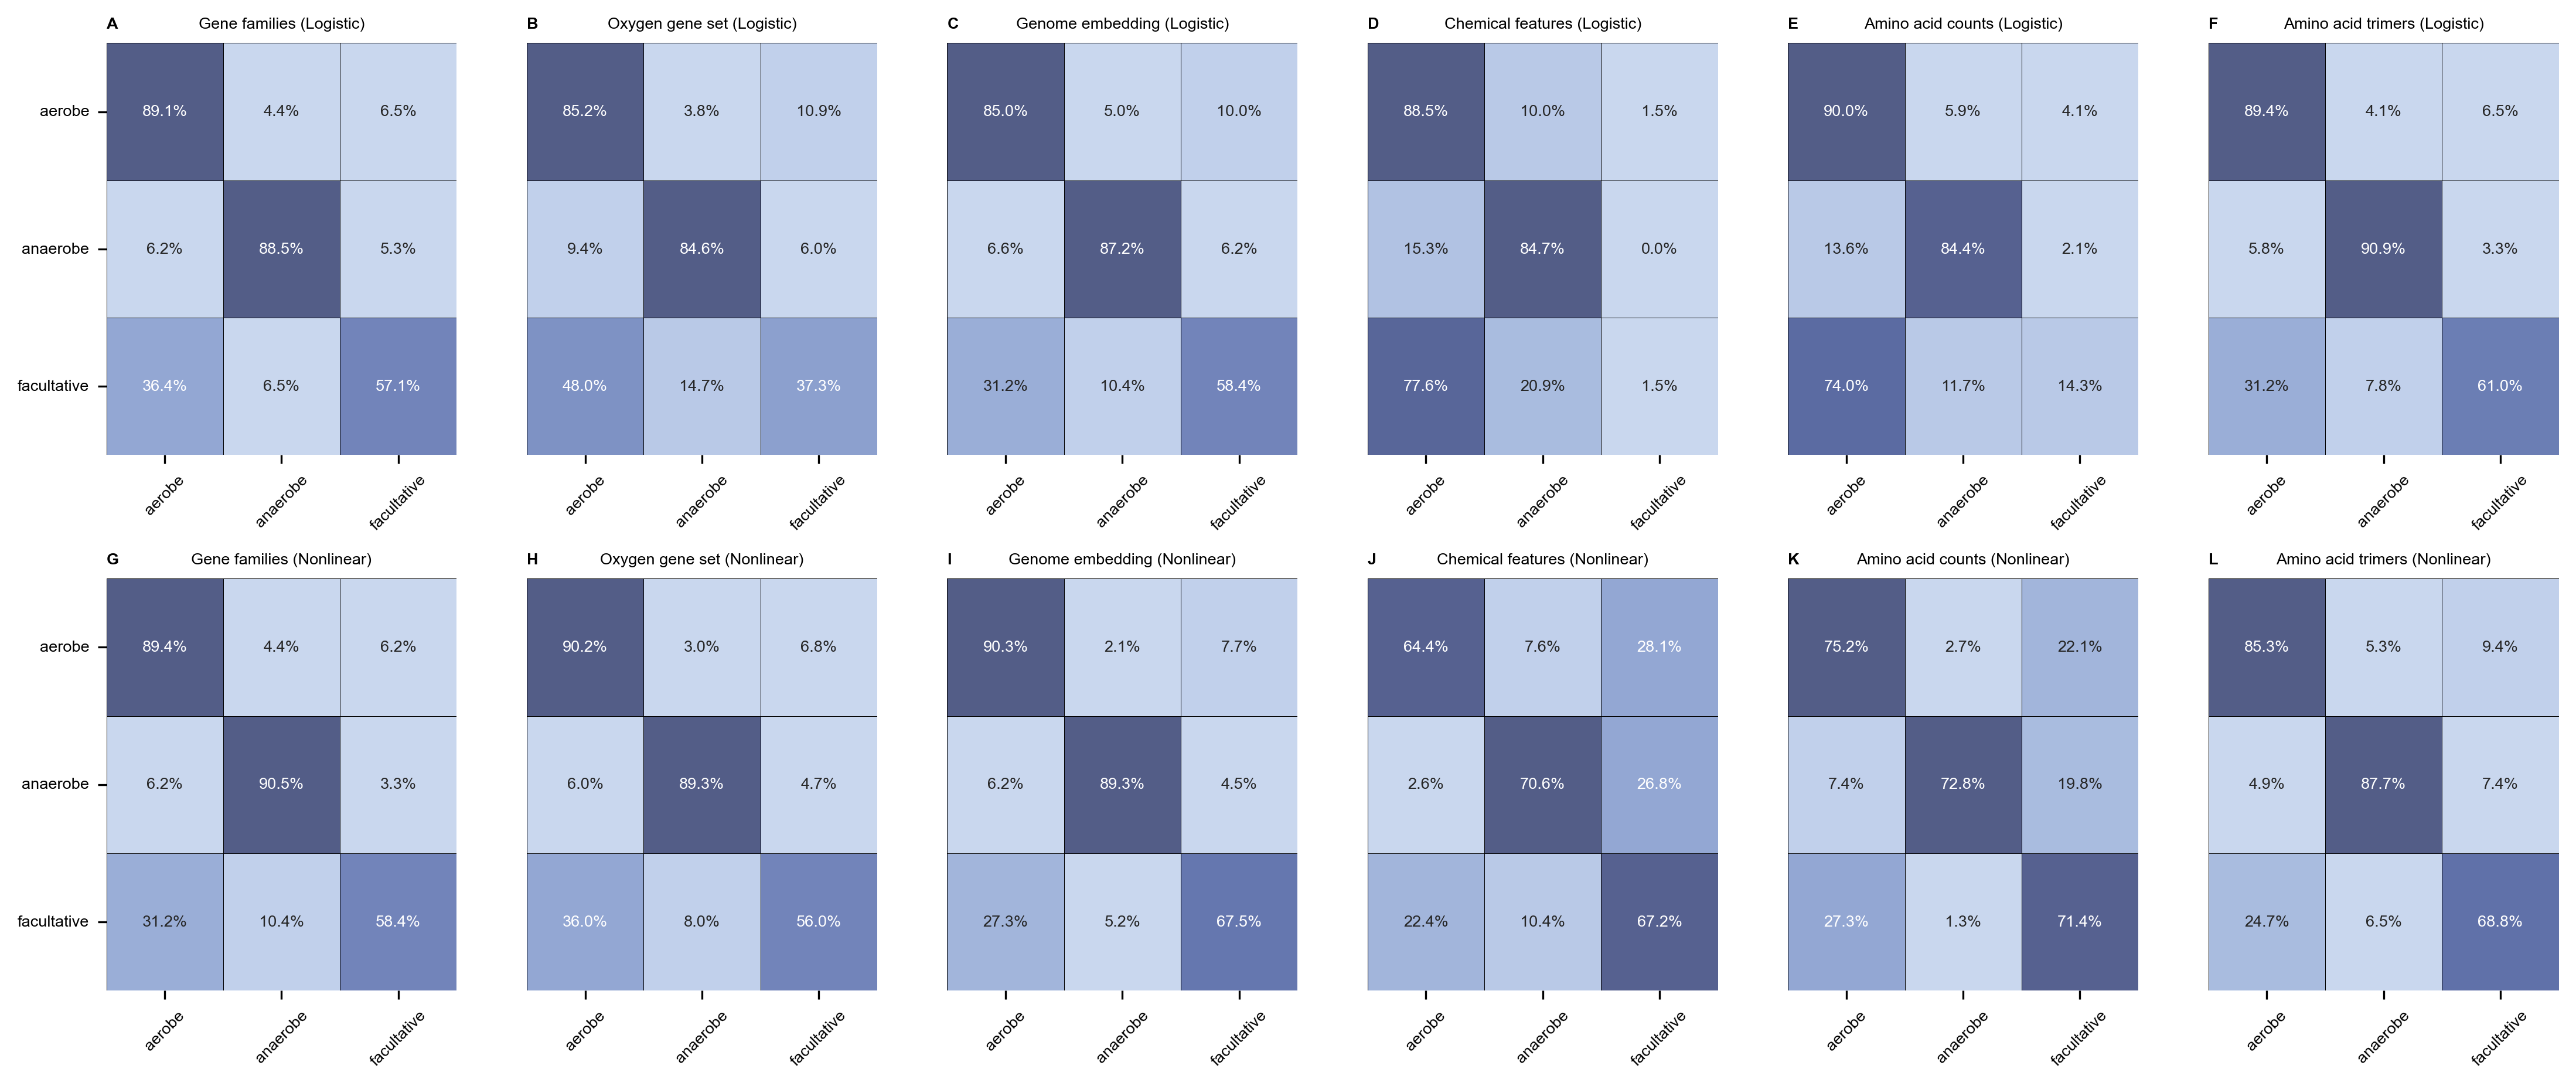

In [12]:
fig = plt.figure(figsize=(3 * len(FEATURE_TYPES), 7))
grid = GridSpec(2, len(FEATURE_TYPES), hspace=0.3)

# TODO: Linear first!
axes = plot_si_figure_3a(logistic_results, fig=fig, grids=[grid[0, i] for i in range(len(FEATURE_TYPES))])
axes += plot_si_figure_3b(nonlinear_results, fig=fig, grids=[grid[1, i] for i in range(len(FEATURE_TYPES))])

for ax, ax_label in zip(axes, 'ABCDEFGHIJKL'):
    ax.set_title(ax_label, loc='left', fontweight='bold')

plt.savefig('../results/figures/si_fig3.png', dpi=300, facecolor='w', bbox_inches='tight')
plt.show()